# Model dip and peak test

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from joblib import dump, load


In [13]:
df = pd.read_csv("../data/BTCUSDT-minute-target-peak-features.csv")
df = df.loc[:,~df.columns.duplicated()]

In [14]:
indicators = ['volume_nvi_o_close_rate_50',
 'mom_srsi_10_d',
 'bb',
 'volatility_dc_wband_10',
 'volatility_bb_pband_100',
 'volatility_bb_wband_200',
 'trend_trix_20_log',
 'trend_vi_50_amp',
 'mom_rsi_30',
 'volume_cmf_50_rate_200',
 'trend_sma_200_diff_o_close_log',
 'mom_ppo_30_hist',
 'trend_sma_50_diff_log',
 'target']

In [15]:
d = df.copy()
d.dropna(inplace=True)
ft_split = 20000
close = d["close"][-ft_split:]

d = d[list(indicators)].copy().astype(np.float32)

X = d.drop(["target", "close"], axis=1, errors="ignore")[:-ft_split]
y = d["target"][:-ft_split]

X_ft = d.drop(["target", "close"], axis=1, errors="ignore")[-ft_split:]
y_ft = d["target"][-ft_split:]

In [25]:
model_dip = load('../models/model_minute_dip_v1.test.joblib') 
model_peak = load('../models/model_minute_peak_v1.test.joblib') 

In [24]:
srd.count(None)

2000

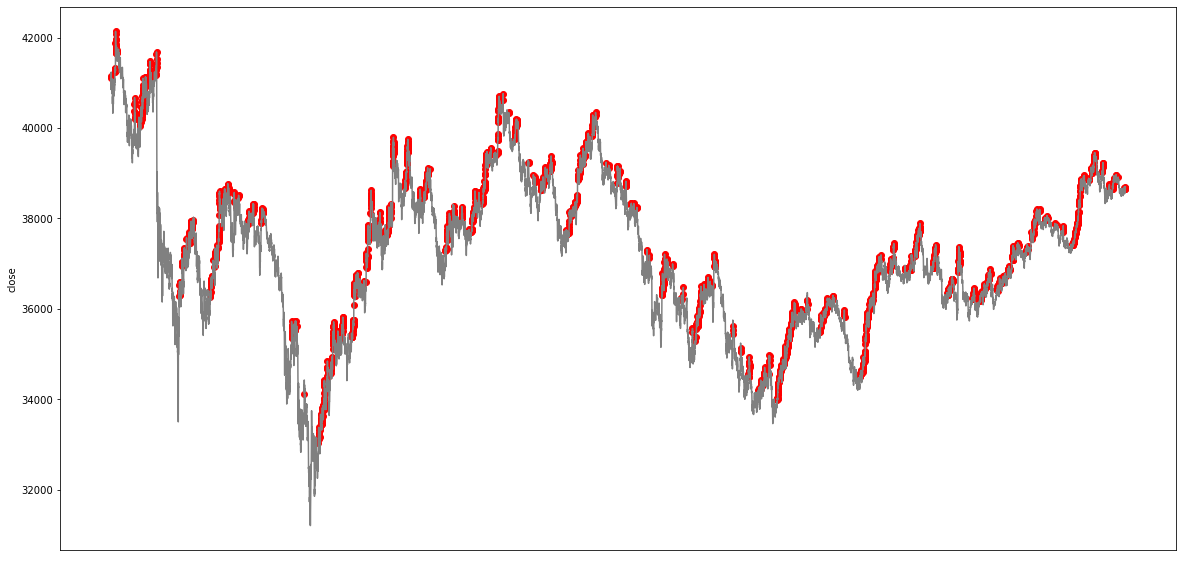

In [40]:
a = 0
b = 20000 #max 20000
r_dip = model_dip.predict(X_ft[a:b])
r_peak = model_peak.predict(X_ft[a:b])

srd = list(map(lambda x, c: c if x == 1 else None, r_dip, close[a:b]))
srp = list(map(lambda x, c: c if x == 1 else None, r_peak, close[a:b]))


# s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft[a:b], close[a:b]))
# s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft[a:b], close[a:b]))
# s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft[a:b], close[a:b]))

fig,ax = plt.subplots(figsize=(20, 10))


rows = len(close[a:b])

ax.scatter(range(rows), 
            srp,
            color="red")
# ax.scatter(range(rows), 
#             srd,
#             color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close[a:b],
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

In [43]:
test = pd.DataFrame(r_peak, columns=["target"])
test["close"] = list(close)

In [44]:
test.to_csv("../data/peak-test.csv", index=False)